Make sure to install and then import all the required python packages before beginning

In [17]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.special import comb
import statsmodels.api as sm

Problem #1:
[30 in Total] Practice Goal: OLS estimation/Cross validation/ MLE estimation for linear model

Problem #1 - (1)	
Use observation ID 1-400 (you will use the last 100 data points as holdout sample for cross-validation) to estimate this model using Ordinary Least Square (OLS) method and report the coefficients and standard errors of the coefficients.  [8]

In [14]:
#bring in the data into python dataframe
df = pd.read_excel('C:/Users/MarvinEspinoza-Leiva/github-repo-folder/adv_bus_analytics/homework_1/hw1_housing_data-1.xlsx')
df.head()

,ID,CRIM,CHAS,NOX,RM,AGE,DIS,PTRATIO,MEDV
0,1,7.52601,0,0.713,6.417,98.3,2.1850,20.2,13.00
1,2,1.51902,1,0.605,8.375,93.9,2.1620,14.7,50.00
2,3,0.28392,0,0.493,5.708,74.3,4.7211,19.6,18.50
3,4,0.11460,0,0.464,6.538,58.7,3.9175,18.6,24.40
4,5,8.79212,0,0.584,5.565,70.6,2.0635,20.2,17.16


In [19]:
#filter data to only use ID 1-400
filtered_df = df[df['ID'] <= 400]

#Using OLS linear regression, estimate the following model:  MEDV = constant + CRIM + CHAS + NOX + RM + AGE + DIS + PTRATIO
X = filtered_df[['CRIM', 'CHAS', 'NOX', 'RM','AGE','DIS','PTRATIO']]  # Independent variables
y = filtered_df['MEDV']  # Dependent variable

# Add constant (intercept)
X = sm.add_constant(X)

# Create and fit model
model = sm.OLS(y, X).fit()

#produce the coefficients
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     116.4
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.26e-91
Time:                        13:39:00   Log-Likelihood:                -1226.6
No. Observations:                 400   AIC:                             2469.
Df Residuals:                     392   BIC:                             2501.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3583      5.265      4.057      0.000      11.008      31.709
CRIM          -0.1214      0.037     -3.259      0.001      -0.195      -0.048
CHAS           3.0206      1.074      2.811      0.005       0.908       5.133
NOX          -23.2308      3.956     -5.872      0.000     -31.009     -15.453
RM             6.8058      0.411     16.540      0.000       5.997       7.615
AGE           -0.0501      0.015     -3.321      0.001      -0.080      -0.020
DIS           -1.2356      0.215     -5.739      0.000      -1.659      -0.812
PTRATIO       -1.1073      0.138     -8.013      0.000      -1.379      -0.836
==============================================================================
Omnibus:                      157.355   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              943.192
Skew:                           1.559   Prob(JB):                    1.54e-205
Kurtosis:                       9.846   Cond. No.                     1.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Problem #1 - (2):
The interpretrations of B0, B1, and B2 are the following:
B0 (constant) = The expected median value of homes in Boston when all other variables in the model equal 0 is $21,358.3
B1 (CRIM) = For every 1 unit increase in the per capita crime rate, there is an expected decrease in median home values by $121.40, holding all other variables constant.
B2 (CHAS) = Houses in census tracts that bound the Charles River have an expected median value $3,020.60 higher than houses in tracts that do not bound the river, holding all other variables constant.

Text(0.5, 1.0, 'Actual vs Predicted Home Values')

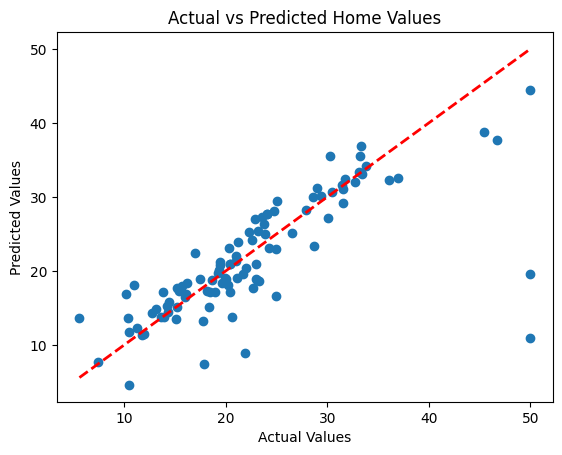

In [22]:
#Problem #1 - (3)
'''
(3)	Predict the values for the last 100 data points using the model you estimated in the last part.
Plot the actual values versus predicted values.
Comment on how well the model does for out of sample prediction [5]
'''

# Get the data points 401-500
test_data = df[df['ID'] > 400]

# Prepare test data (same variables as training)
X_test = test_data[['CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO']]
X_test = sm.add_constant(X_test)  # Add constant
y_test = test_data['MEDV']  # Actual values

# Make predictions
predictions = model.predict(X_test)

# Create scatter plot
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Home Values')

Commentary on how well the model does for out of sample prediction:

The model seems to perform quite well when predicting values for an out-of-sample testing set of data, until the model attempts to predict values around 50 for the MEDV.
But this makes sense because OLS regression models become less reliable at the tail ends of distirbutions where there may be few data points.  Also, this model performs better in the middle range: Predictions between 15-35 show tighter clustering of data points around the 45 degree line (which represents perfect prediction).